In [26]:
# Applies same noise to all channels (more or less)
import cv2
import numpy as np
import matplotlib.pyplot as plt
def add_gaussian_noise(image, mean=0, stddev=2):
    noisy_image = image.copy()
    for i in range(3):  # Loop through color channels (BGR)
        noise = np.random.normal(mean, stddev, image[:, :, i].shape).astype(np.uint8)
        noisy_image[:, :, i] = cv2.add(image[:, :, i], noise)
    return noisy_image

def add_salt_and_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    noisy_image = image.copy()
    total_pixels = image.size
    num_salt = int(total_pixels * salt_prob)
    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    for i in range(3):  # Loop through color channels (BGR)
        noisy_image[salt_coords[0], salt_coords[1], i] = 255  # Set salt noise to max intensity
    num_pepper = int(total_pixels * pepper_prob)
    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    for i in range(3):  # Loop through color channels (BGR)
        noisy_image[pepper_coords[0], pepper_coords[1], i] = 0  # Set pepper noise to min intensity
    return noisy_image

def add_speckle_noise(image, stddev=0.1):
    noisy_image = image.copy()
    for i in range(3):  # Loop through color channels (BGR)
        noise = np.random.normal(0, stddev, image[:, :, i].shape)
        noisy_image[:, :, i] = np.uint8(np.clip(image[:, :, i] + image[:, :, i] * noise, 0, 255))
    return noisy_image

def add_poisson_noise(image, scale=25):
    noisy_image = image.copy()
    for i in range(3):  # Loop through color channels (BGR)
        noise = np.random.poisson(scale, image[:, :, i].shape).astype(np.uint8)
        noisy_image[:, :, i] = cv2.add(image[:, :, i], noise)
    return noisy_image

def add_uniform_noise(image, low=0, high=50):
    noisy_image = image.copy()
    for i in range(3):  # Loop through color channels (BGR)
        noise = np.random.uniform(low, high, image[:, :, i].shape).astype(np.uint8)
        noisy_image[:, :, i] = cv2.add(image[:, :, i], noise)
    return noisy_image

def add_periodic_noise(image, amplitude=25, frequency=10):
    noisy_image = image.copy()
    for i in range(3):  # Loop through color channels (BGR)
        h, w = image[:, :, i].shape
        x = np.arange(w)
        y = np.arange(h)
        X, Y = np.meshgrid(x, y)
        noise = amplitude * np.sin(2 * np.pi * frequency * X / w + 2 * np.pi * frequency * Y / h)
        noisy_image[:, :, i] = np.uint8(np.clip(image[:, :, i] + noise, 0, 255))
    return noisy_image

def add_color_crosstalk(image, crosstalk_intensity=0.1):
    noisy_image = image.copy()
    for i in range(3):  # Loop through color channels (BGR)
        noisy_image[:, :, i] = np.uint8(np.clip(image[:, :, i] + crosstalk_intensity * image[:, :, (i + 1) % 3], 0, 255))
    return noisy_image

def add_color_channel_swapping(image):
    noisy_image = image.copy()
    # Randomly permute the color channels
    channel_order = np.random.permutation([0, 1, 2])
    for i in range(3):  # Loop through color channels (BGR)
        noisy_image[:, :, i] = image[:, :, channel_order[i]]
    return noisy_image

def add_chromatic_aberration(image, displacement=5):
    noisy_image = image.copy()
    for i in range(3):  # Loop through color channels (BGR)
        h, w = image[:, :, i].shape
        x, y = np.meshgrid(range(w), range(h))
        noisy_image[:, :, i] = np.uint8(np.clip(image[:, :, i] + displacement * np.sin(2 * np.pi * x / w), 0, 255))
    return noisy_image

def add_quantization_noise(image, quantization_levels=8):
    noisy_image = image.copy()
    for i in range(3):  # Loop through color channels (BGR)
        quantization_values = np.linspace(0, 255, quantization_levels)
        quantized_image = np.digitize(image[:, :, i], quantization_values) - 1
        noisy_image[:, :, i] = (quantized_image * (255 / (quantization_levels - 1))).astype(np.uint8)
    return noisy_image


In [27]:

def display_with_histogram(original_image, noisy_image, title):
    plt.figure(figsize=(16, 8))
    
    # Display the noisy image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    
    channel_colors = ['red', 'green', 'blue']
    
    for i in range(3):
        # Plot the histogram for each color channel of the original image
        plt.subplot(1, 3, 2)
        histogram = cv2.calcHist([original_image], [i], None, [256], [0, 256])
        plt.plot(histogram, color=channel_colors[i])
        plt.title('Histogram - Original') 

        # Plot the histogram for each color channel of the noisy image
        plt.subplot(1, 3, 3)
        histogram = cv2.calcHist([noisy_image], [i], None, [256], [0, 256])
        plt.plot(histogram, color=channel_colors[i])
        plt.title('Histogram - Noisy')

    plt.show()

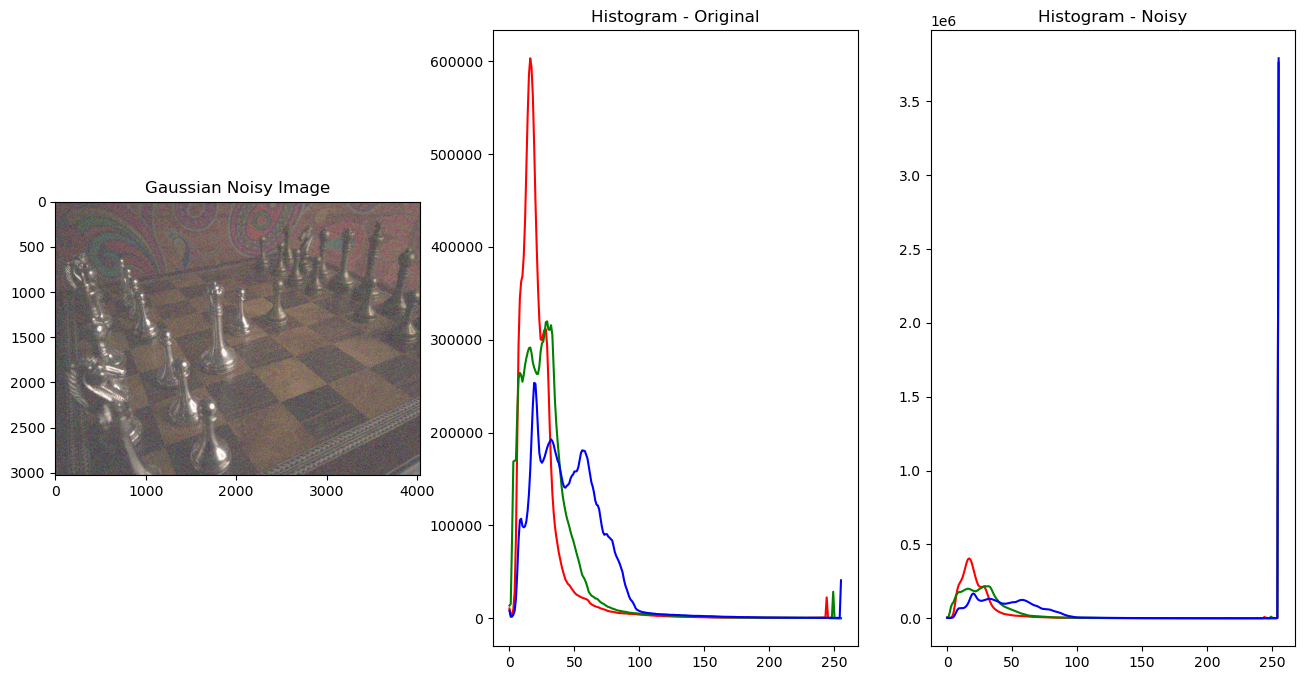

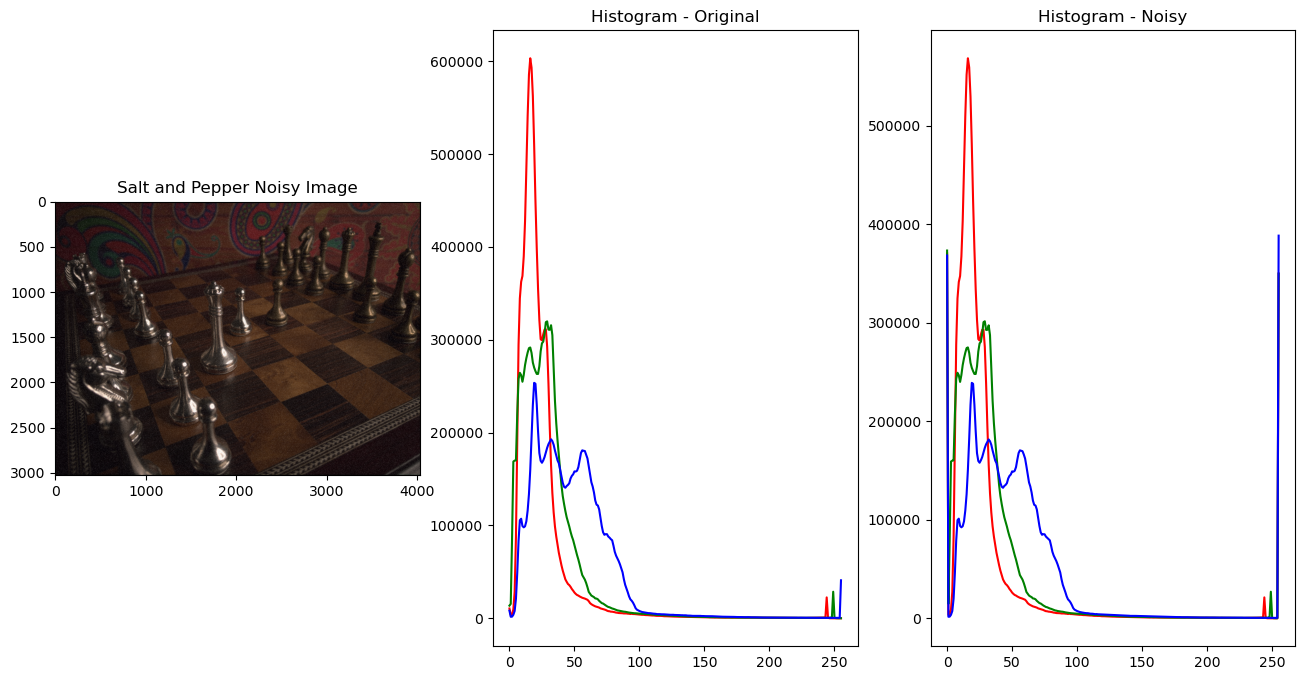

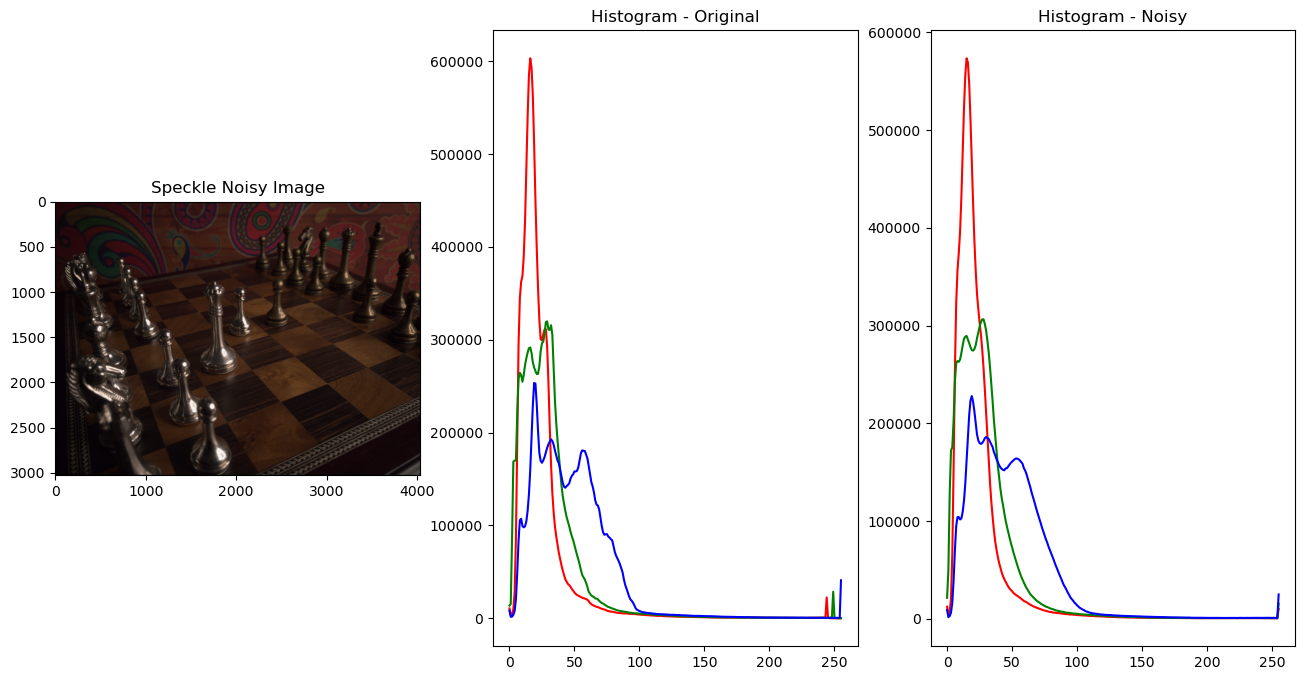

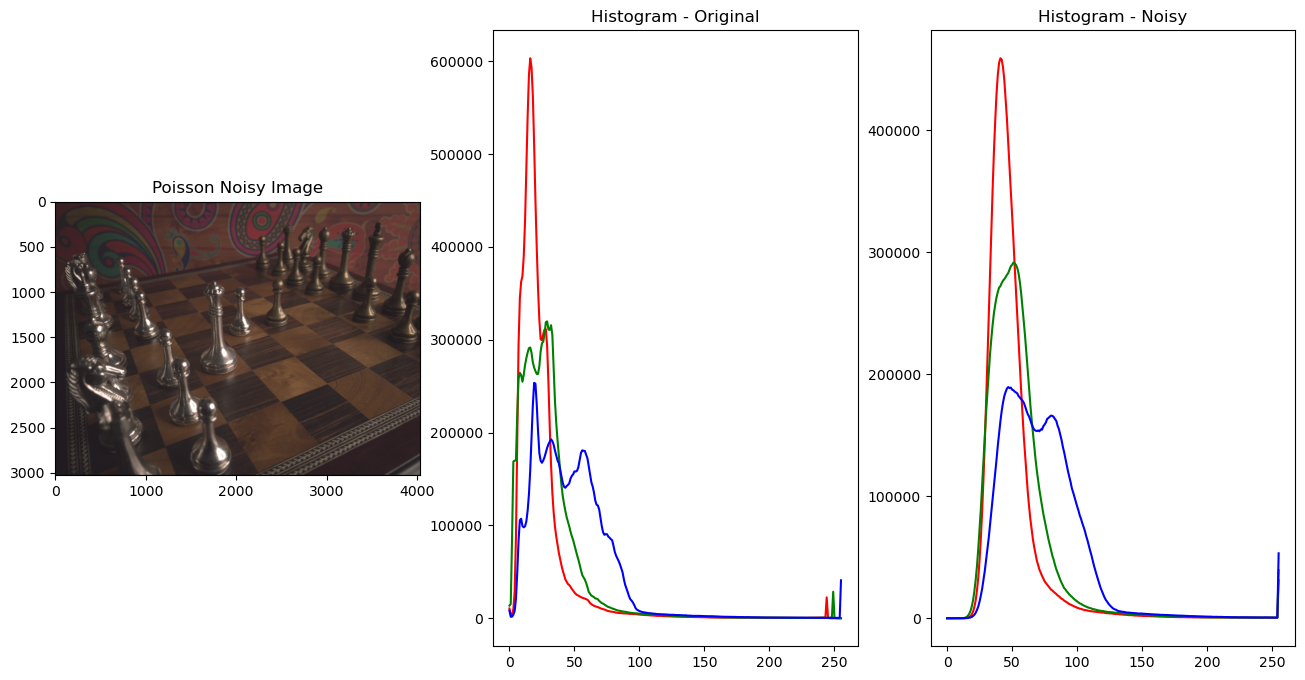

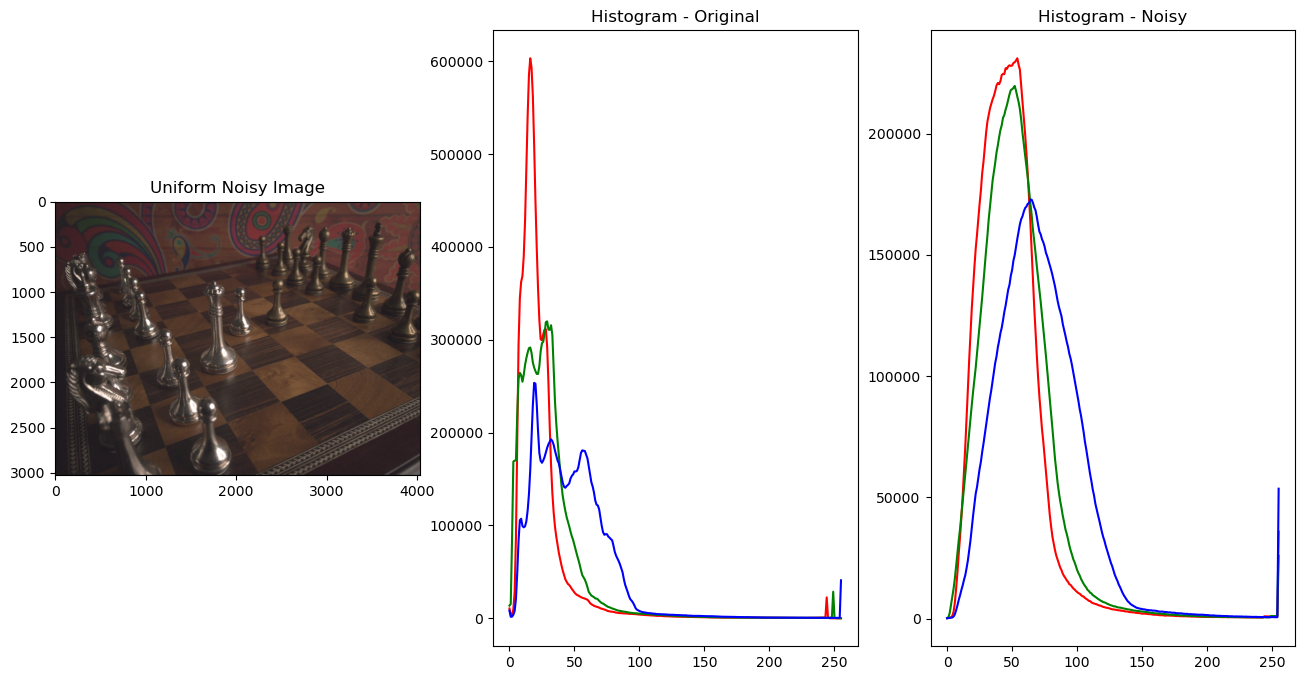

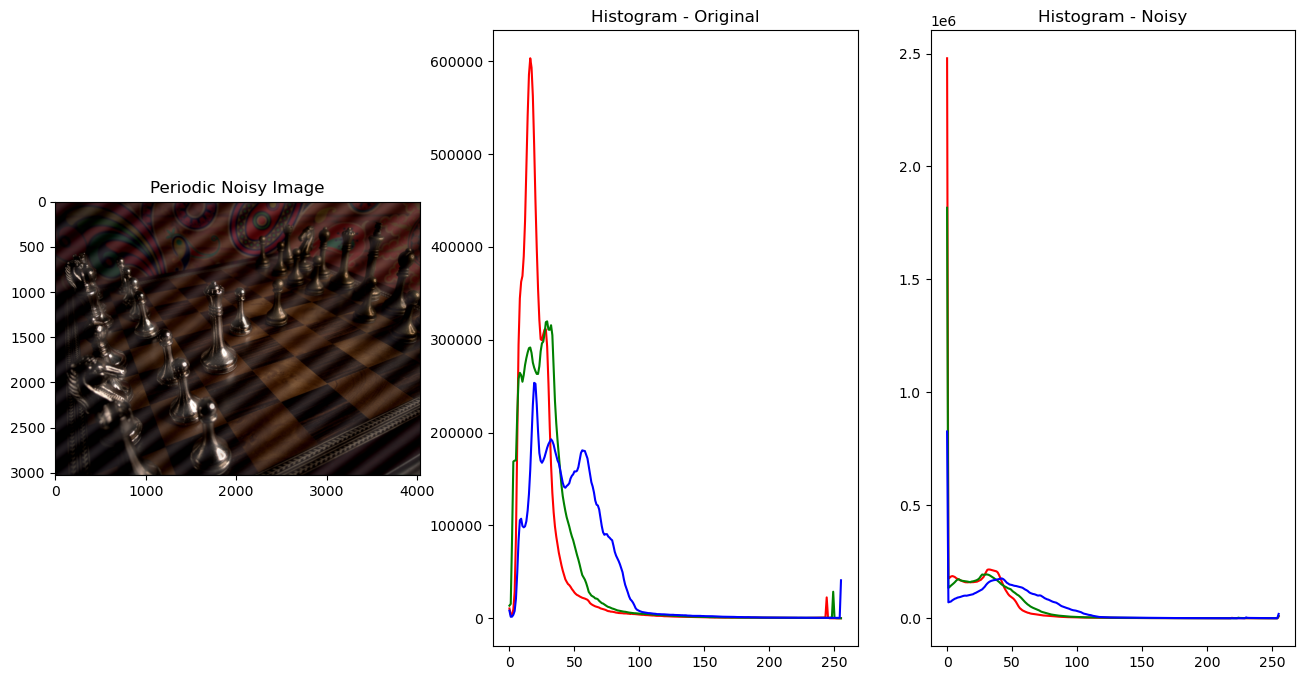

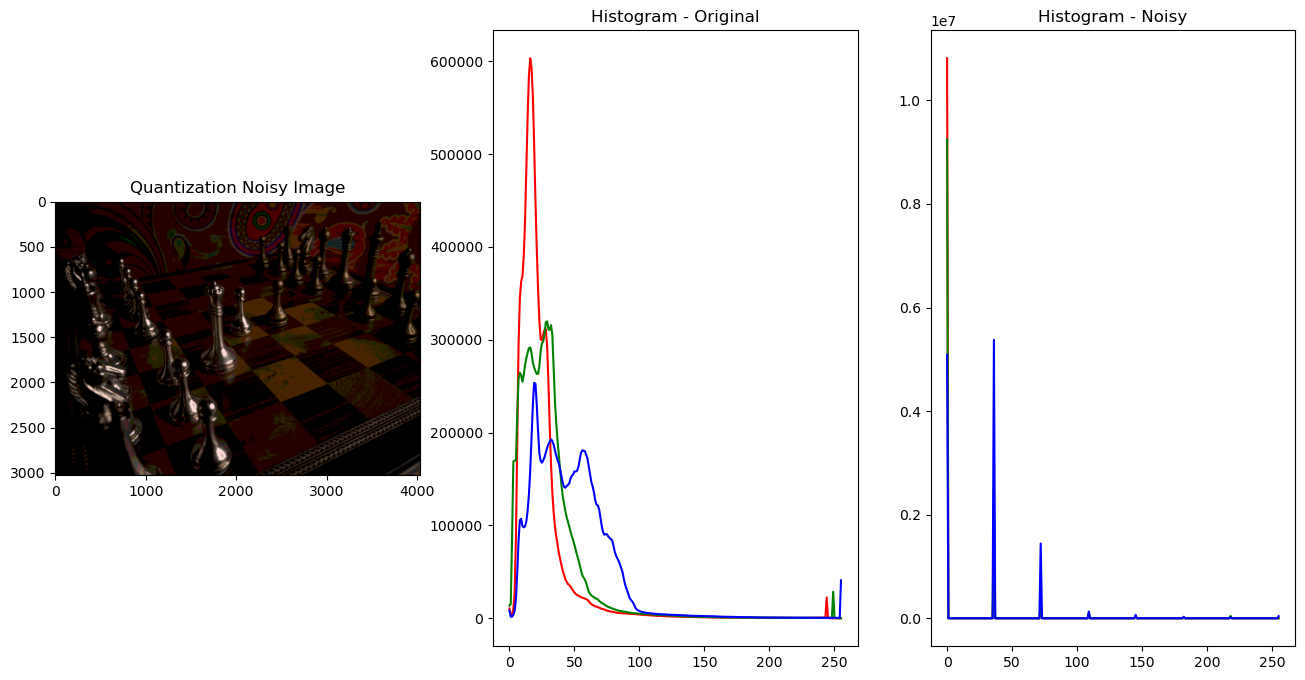

In [28]:

# Load a color image
input_image = cv2.imread('../data/0091_004_IP_00320_00080_3200_L/GT_SRGB_010.png')

# Add Gaussian Noise and display
gaussian_noisy_image = add_gaussian_noise(input_image)
display_with_histogram(input_image, gaussian_noisy_image, 'Gaussian Noisy Image')

# Add Salt and Pepper Noise and display
salt_and_pepper_noisy_image = add_salt_and_pepper_noise(input_image)
display_with_histogram(input_image, salt_and_pepper_noisy_image, 'Salt and Pepper Noisy Image')

# Add Speckle Noise and display
speckle_noisy_image = add_speckle_noise(input_image)
display_with_histogram(input_image, speckle_noisy_image, 'Speckle Noisy Image')

# Add Poisson Noise and display
poisson_noisy_image = add_poisson_noise(input_image)
display_with_histogram(input_image, poisson_noisy_image, 'Poisson Noisy Image')

# Add Uniform Noise and display
uniform_noisy_image = add_uniform_noise(input_image)
display_with_histogram(input_image, uniform_noisy_image, 'Uniform Noisy Image')

# Add Periodic Noise and display
periodic_noisy_image = add_periodic_noise(input_image)
display_with_histogram(input_image, periodic_noisy_image, 'Periodic Noisy Image')

# Add Quantization Noise and display
quantization_noisy_image = add_quantization_noise(input_image)
display_with_histogram(input_image, quantization_noisy_image, 'Quantization Noisy Image')

In [31]:
# Different amount of noise per channel

import cv2
import numpy as np

def add_gaussian_noise(image, mean=0, stddevs=(1, 2, 3)):
    noisy_image = image.copy()
    for i in range(3):  # Loop through color channels (BGR)
        noise = np.random.normal(mean, stddevs[i], image[:, :, i].shape).astype(np.uint8)
        noisy_image[:, :, i] = cv2.add(image[:, :, i], noise)
    return noisy_image

def add_salt_and_pepper_noise(image, salt_probs=(0.01, 0.01, 0.01), pepper_probs=(0.01, 0.01, 0.01)):
    noisy_image = image.copy()
    total_pixels = image.size
    for i in range(3):  # Loop through color channels (BGR)
        num_salt = int(total_pixels * salt_probs[i])
        salt_coords = [np.random.randint(0, j - 1, num_salt) for j in image[:, :, i].shape]
        noisy_image[salt_coords[0], salt_coords[1], i] = 255  # Set salt noise to max intensity
        num_pepper = int(total_pixels * pepper_probs[i])
        pepper_coords = [np.random.randint(0, j - 1, num_pepper) for j in image[:, :, i].shape]
        noisy_image[pepper_coords[0], pepper_coords[1], i] = 0  # Set pepper noise to min intensity
    return noisy_image

def add_speckle_noise(image, stddevs=(0.1, 0.2, 0.3)):
    noisy_image = image.copy()
    for i in range(3):  # Loop through color channels (BGR)
        noise = np.random.normal(0, stddevs[i], image[:, :, i].shape)
        noisy_image[:, :, i] = np.uint8(np.clip(image[:, :, i] + image[:, :, i] * noise, 0, 255))
    return noisy_image

def add_poisson_noise(image, scales=(25, 50, 75)):
    noisy_image = image.copy()
    for i in range(3):  # Loop through color channels (BGR)
        noise = np.random.poisson(scales[i], image[:, :, i].shape).astype(np.uint8)
        noisy_image[:, :, i] = cv2.add(image[:, :, i], noise)
    return noisy_image

def add_uniform_noise(image, lows=(0, 10, 20), highs=(50, 100, 150)):
    noisy_image = image.copy()
    for i in range(3):  # Loop through color channels (BGR)
        noise = np.random.uniform(lows[i], highs[i], image[:, :, i].shape).astype(np.uint8)
        noisy_image[:, :, i] = cv2.add(image[:, :, i], noise)
    return noisy_image

def add_periodic_noise(image, amplitudes=(25, 50, 75), frequencies=(10, 20, 30)):
    noisy_image = image.copy()
    for i in range(3):  # Loop through color channels (BGR)
        h, w = image[:, :, i].shape
        x = np.arange(w)
        y = np.arange(h)
        X, Y = np.meshgrid(x, y)
        noise = amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * X / w + 2 * np.pi * frequencies[i] * Y / h)
        noisy_image[:, :, i] = np.uint8(np.clip(image[:, :, i] + noise, 0, 255))
    return noisy_image

def add_color_crosstalk(image, crosstalk_intensity=(0.1, 0.2, 0.3)):
    noisy_image = image.copy()
    for i in range(3):  # Loop through color channels (BGR)
        noisy_image[:, :, i] = np.uint8(np.clip(image[:, :, i] + crosstalk_intensity[i] * image[:, :, (i + 1) % 3], 0, 255))
    return noisy_image

def add_color_channel_swapping(image):
    noisy_image = image.copy()
    # Randomly permute the color channels
    channel_order = np.random.permutation([0, 1, 2])
    for i in range(3):  # Loop through color channels (BGR)
        noisy_image[:, :, i] = image[:, :, channel_order[i]]
    return noisy_image

def add_chromatic_aberration(image, displacements=(5, 10, 15)):
    noisy_image = image.copy()
    for i in range(3):  # Loop through color channels (BGR)
        h, w = image[:, :, i].shape
        x, y = np.meshgrid(range(w), range(h))
        noisy_image[:, :, i] = np.uint8(np.clip(image[:, :, i] + displacements[i] * np.sin(2 * np.pi * x / w), 0, 255))
    return noisy_image

def add_quantization_noise(image, quantization_levels=(8, 16, 32)):
    noisy_image = image.copy()
    for i in range(3):  # Loop through color channels (BGR)
        quantization_values = np.linspace(0, 255, quantization_levels[i])
        quantized_image = np.digitize(image[:, :, i], quantization_values) - 1
        noisy_image[:, :, i] = (quantized_image * (255 / (quantization_levels[i] - 1))).astype(np.uint8)
    return noisy_image


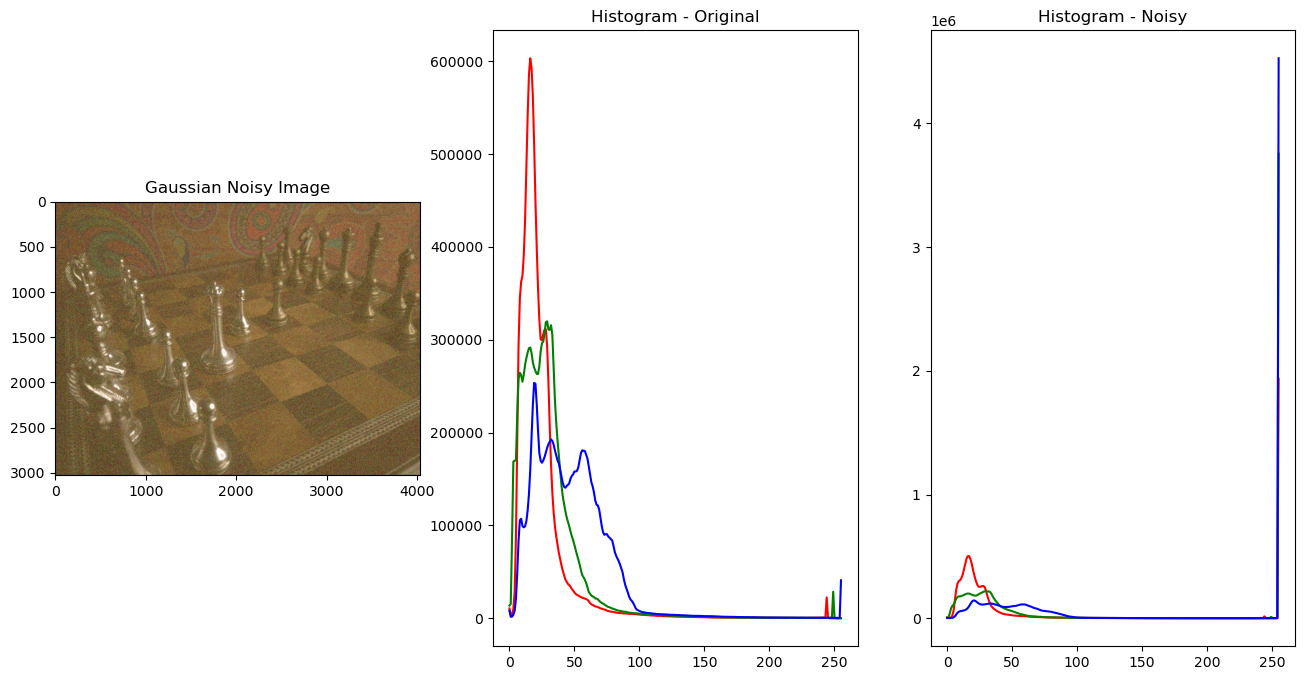

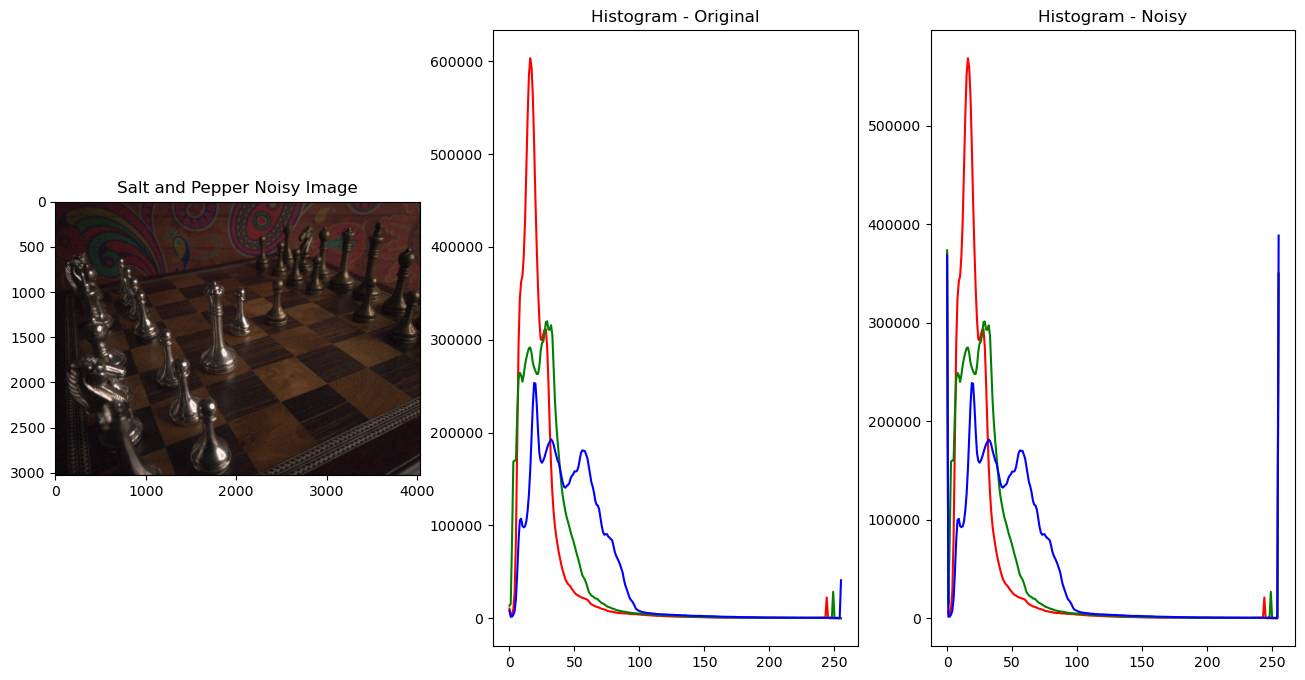

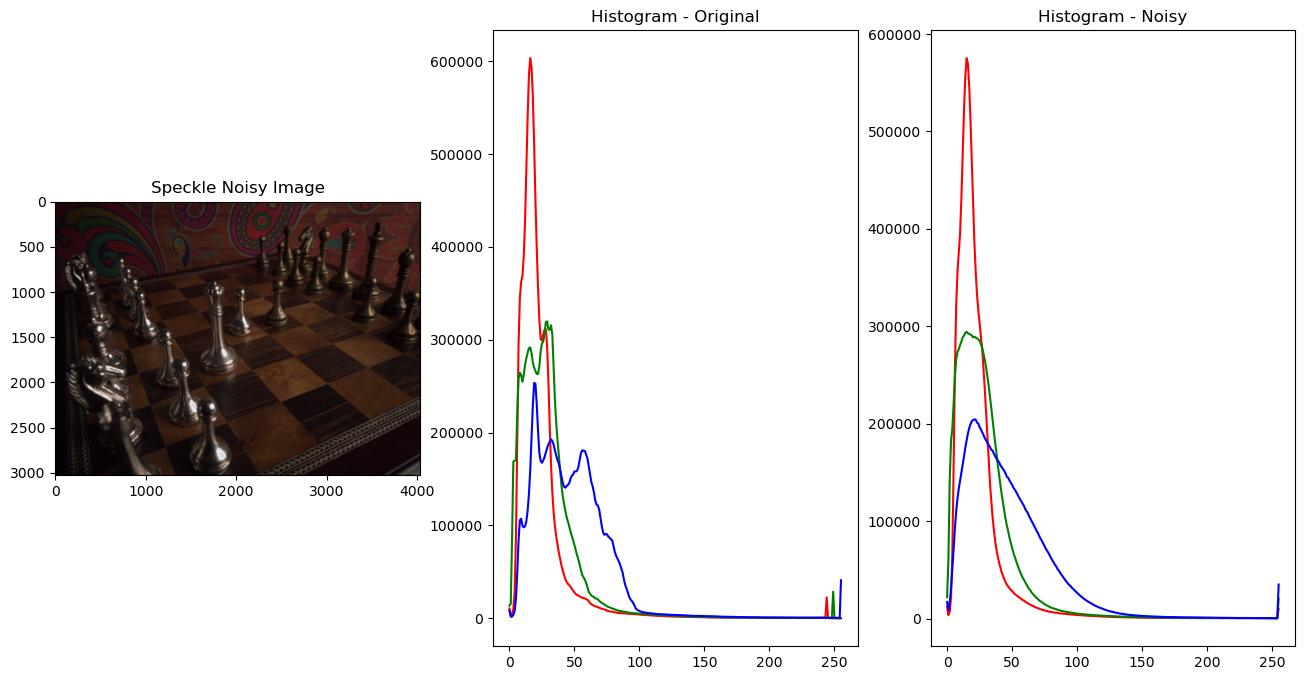

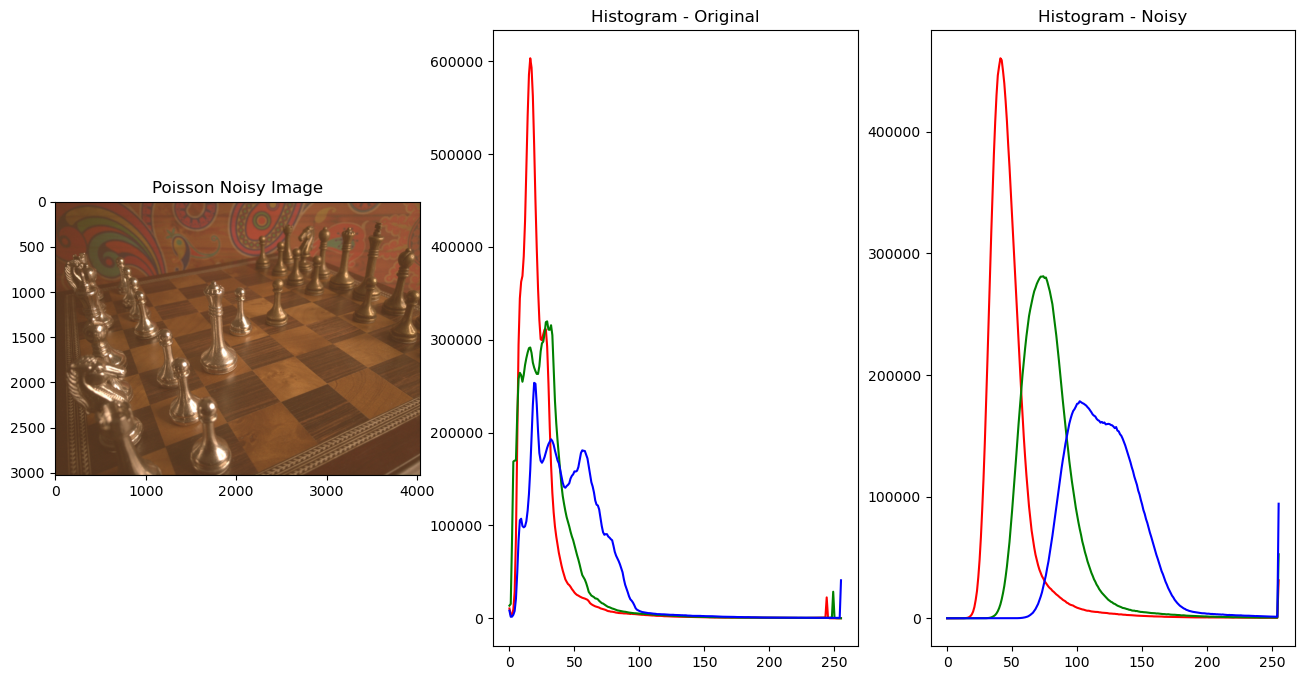

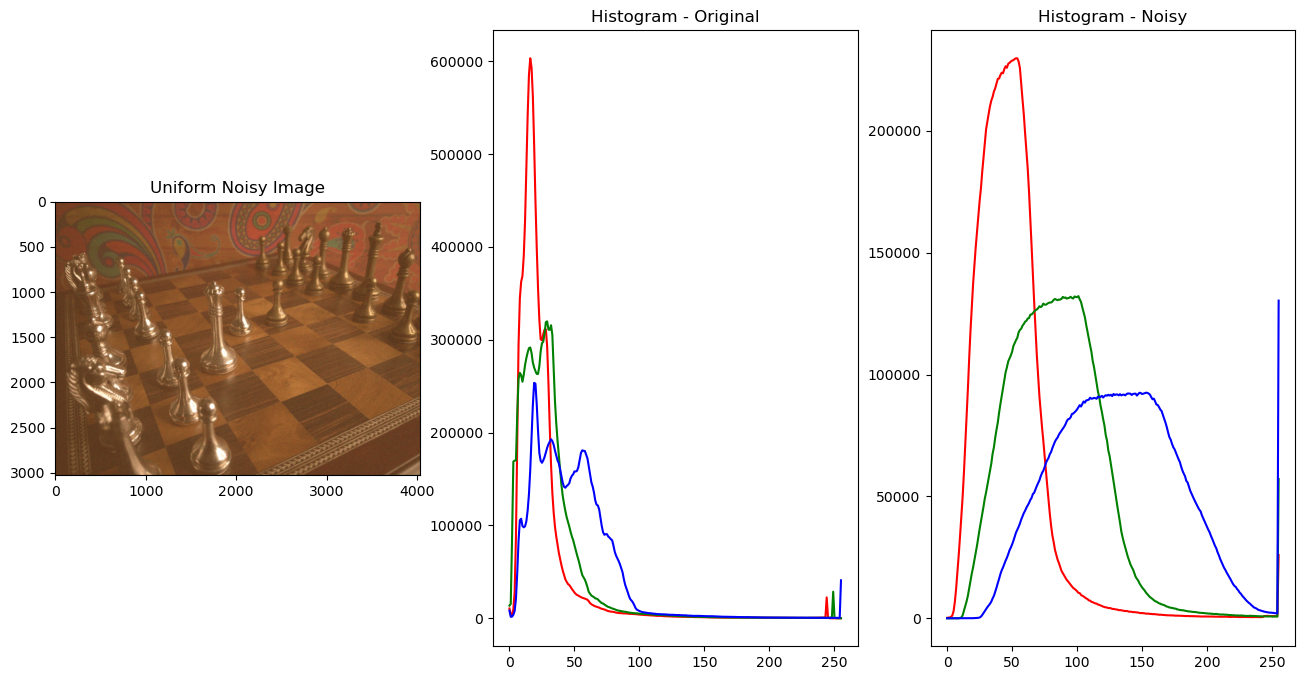

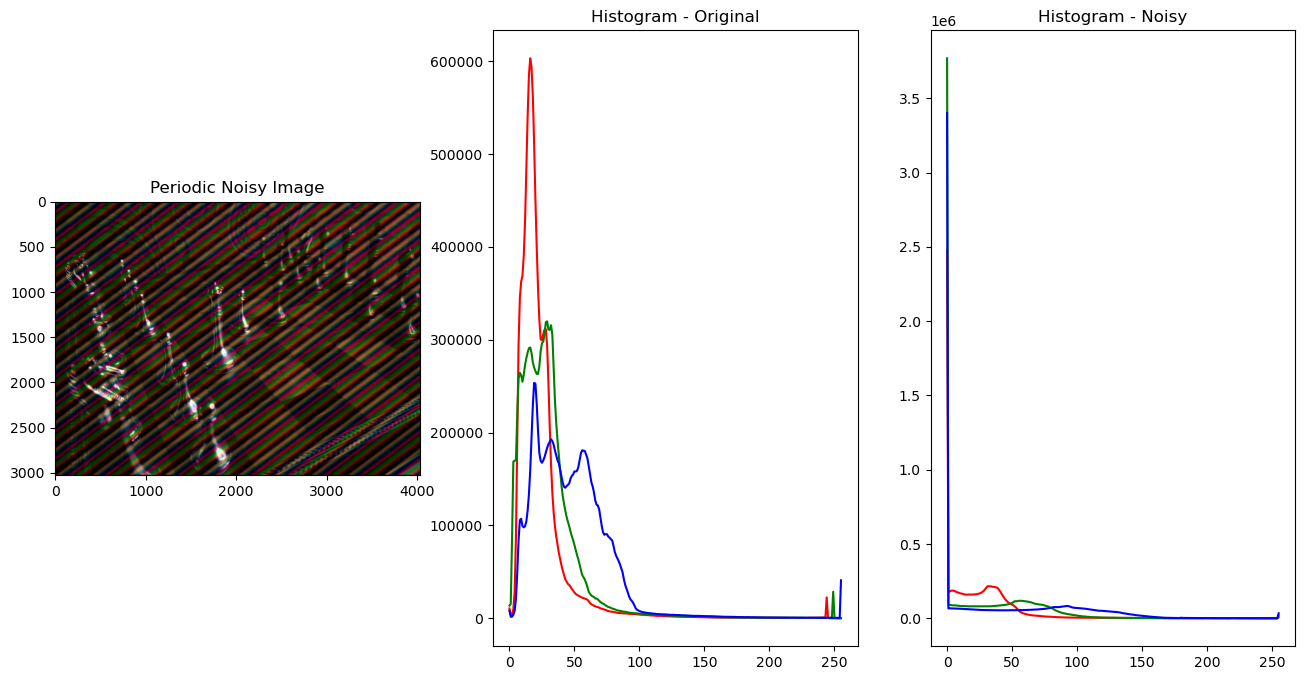

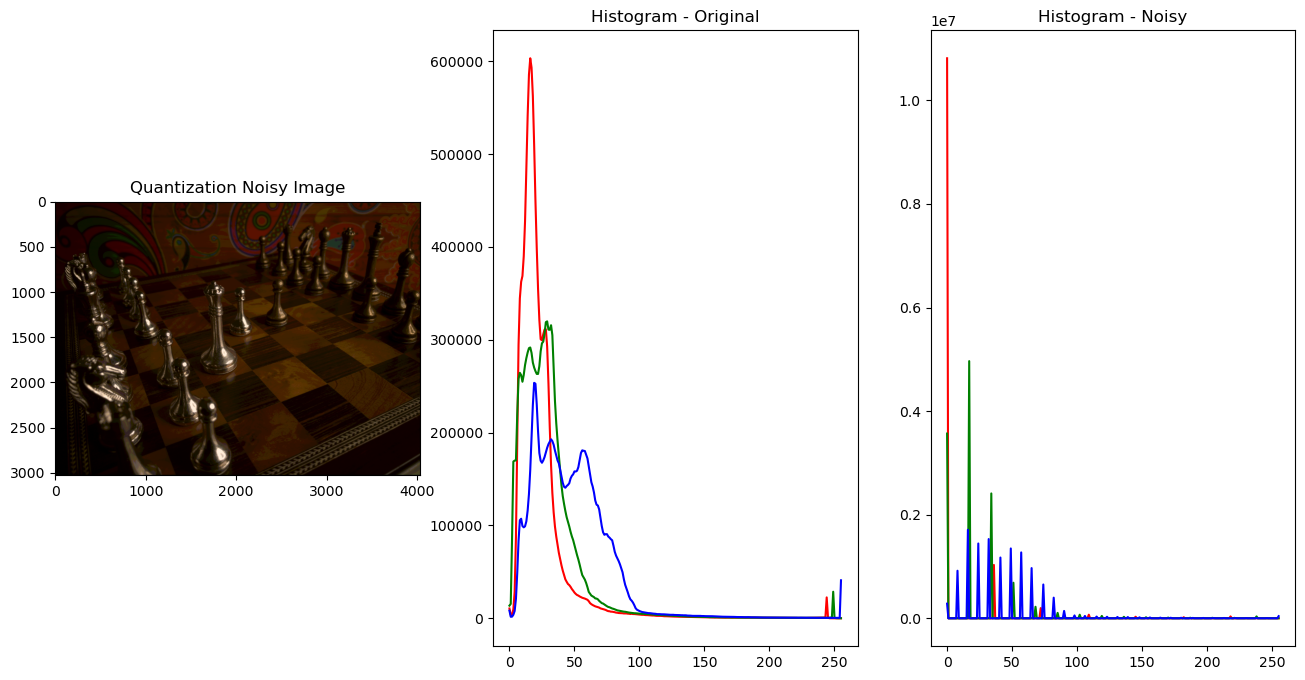

In [32]:

# Load a color image
input_image = cv2.imread('../data/0091_004_IP_00320_00080_3200_L/GT_SRGB_010.png')

# Add Gaussian Noise and display
gaussian_noisy_image = add_gaussian_noise(input_image)
display_with_histogram(input_image, gaussian_noisy_image, 'Gaussian Noisy Image')

# Add Salt and Pepper Noise and display
salt_and_pepper_noisy_image = add_salt_and_pepper_noise(input_image)
display_with_histogram(input_image, salt_and_pepper_noisy_image, 'Salt and Pepper Noisy Image')

# Add Speckle Noise and display
speckle_noisy_image = add_speckle_noise(input_image)
display_with_histogram(input_image, speckle_noisy_image, 'Speckle Noisy Image')

# Add Poisson Noise and display
poisson_noisy_image = add_poisson_noise(input_image)
display_with_histogram(input_image, poisson_noisy_image, 'Poisson Noisy Image')

# Add Uniform Noise and display
uniform_noisy_image = add_uniform_noise(input_image)
display_with_histogram(input_image, uniform_noisy_image, 'Uniform Noisy Image')

# Add Periodic Noise and display
periodic_noisy_image = add_periodic_noise(input_image)
display_with_histogram(input_image, periodic_noisy_image, 'Periodic Noisy Image')

# Add Quantization Noise and display
quantization_noisy_image = add_quantization_noise(input_image)
display_with_histogram(input_image, quantization_noisy_image, 'Quantization Noisy Image')